In [1]:
import pandas as pd
import os
from datetime import datetime, timedelta

In [4]:
hourly_dir = "../india_processing/india_hourly"
panel_dir = "../india_panel"

In [12]:
hourly_df = pd.read_csv(os.path.join(panel_dir, "panel_daily_070824.csv"))

In [16]:
# Subset the repeated datetimes into a separate dataframe
repeated_datetimes_df = hourly_df[hourly_df.duplicated(subset=['date', 'station_id'], keep=False)]

In [18]:
trimmed_datetime = repeated_datetimes_df[repeated_datetimes_df['freq'] != 0]

In [19]:
trimmed_datetime

,date,pct_blackout,avg_duration,freq,t2m_k,d2m,sp,wind,sh,rh,e,tp,station_id,location,district,state,lat,lon
237421,2015-08-06,0.624306,124.250000,4,302.072247,296.791143,98557.554035,1.969154,0.063846,28.306787,-0.002982,2.729222,498,Vikas Nagar,Lucknow,Uttar Pradesh,26.898006,80.964259
237423,2015-08-07,0.611806,175.800000,5,300.257926,298.127969,98771.974938,2.220069,0.057226,26.695530,-0.001648,38.263239,498,Vikas Nagar,Lucknow,Uttar Pradesh,26.898006,80.964259
237424,2015-08-07,0.611806,60.500000,2,300.257926,298.127969,98771.974938,2.220069,0.057226,26.695530,-0.001648,38.263239,498,Vikas Nagar,Lucknow,Uttar Pradesh,26.898006,80.964259
237425,2015-08-08,0.066667,47.500000,2,301.457962,298.293032,98780.922749,1.687405,0.061541,27.741368,-0.002256,5.093044,498,Vikas Nagar,Lucknow,Uttar Pradesh,26.898006,80.964259
237426,2015-08-08,0.066667,25.750000,8,301.457962,298.293032,98780.922749,1.687405,0.061541,27.741368,-0.002256,5.093044,498,Vikas Nagar,Lucknow,Uttar Pradesh,26.898006,80.964259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238127,2016-01-07,0.000000,45.800000,5,292.397528,286.844730,100337.452482,1.373369,0.036465,20.503107,-0.000405,0.000855,498,Vikas Nagar,Lucknow,Uttar Pradesh,26.898006,80.964259
238129,2016-01-08,0.004167,15.666667,3,292.530628,286.414544,100152.144342,2.870960,0.036573,20.583721,-0.000370,0.019666,498,Vikas Nagar,Lucknow,Uttar Pradesh,26.898006,80.964259
238130,2016-01-08,0.004167,6.000000,1,292.530628,286.414544,100152.144342,2.870960,0.036573,20.583721,-0.000370,0.019666,498,Vikas Nagar,Lucknow,Uttar Pradesh,26.898006,80.964259
238131,2016-01-09,0.004861,31.000000,1,290.410201,281.304059,100043.014237,4.007925,0.032075,19.098088,-0.000335,0.000855,498,Vikas Nagar,Lucknow,Uttar Pradesh,26.898006,80.964259


In [11]:
hourly_df.columns

Index(['datetime', 'pct_blackout', 't2m_k', 'd2m', 'wind', 'tp', 'e', 'sp',
       'sh', 'rh', 'station_id', 'location', 'district', 'state', 'lat',
       'lon'],
      dtype='object')

In [ ]:
file_path = os.path.join(hourly_dir, 'hourly_station_356.csv')

df = pd.read_csv(file_path, index_col=False, parse_dates=['hour'])

<Axes: xlabel='hour', ylabel='pct_blackout'>

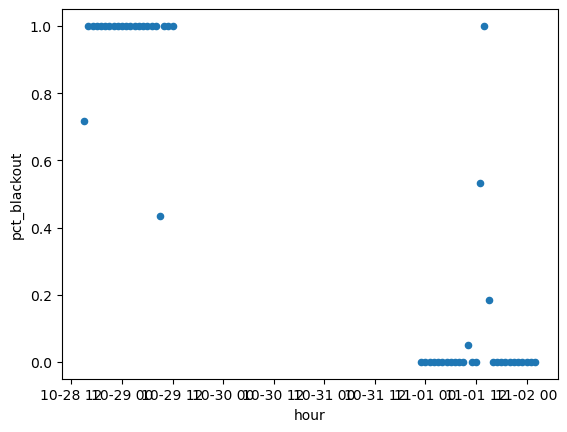

In [21]:
df.iloc[0:50, :].plot(x='hour', y='pct_blackout', kind='scatter')

<Axes: ylabel='Frequency'>

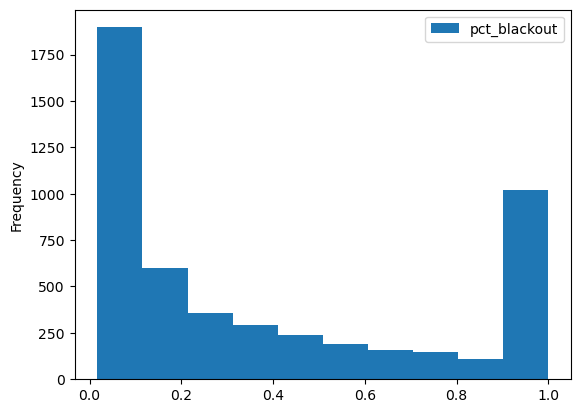

In [22]:
df[df['pct_blackout'] != 0].plot(y='pct_blackout', kind='hist')

In [34]:
hourly_dir = "./india_processing/india_uniform"
file_path = os.path.join(hourly_dir, 'station_356.csv')

station_df = pd.read_csv(file_path, index_col=False, parse_dates=['time'])

index = 0
previous_hour = None
complete_hours = 0
hours_encountered = 0
while index + 60 < station_df.shape[0]:
        if previous_hour is None:
            if station_df['time'][index].minute == 0 and station_df['time'][index].second == 0:
                previous_hour = station_df['time'][index]
        else:
            # If the hour is complete, we take the percentage of that portion of the dataset that is 0 voltage, and save that with the datetime of the
            # beginning of the one hour period
            next_hour = previous_hour + timedelta(hours = 1, minutes = 0, seconds = 0)
            if station_df['time'][index + 60] == next_hour:
                index = index + 60
                previous_hour = next_hour
                complete_hours += 1
                hours_encountered += 1
            else:
                # We can backtrack until we hit the next whole hour or before, then do the sixty minutes test again
                while station_df['time'][index] >= next_hour:
                    print(f'{station_df["time"][index]}, {next_hour}')
                    if station_df['time'][index] == next_hour:
                        previous_hour = next_hour
                        hours_encountered += 1
                        break
                    else:
                        index -= 1 
                if station_df['time'][index] < next_hour:
                    while index < station_df.shape[0]:
                        curr_time = station_df['time'][index]
                        if curr_time.minute == 0 and curr_time.second == 0 and curr_time > previous_hour:
                            previous_hour = curr_time
                            hours_encountered += 1
                            break
                        else:
                            index += 1
                            
total_hours_in_range = (station_df['time'][station_df.shape[0] - 1] - station_df['time'][0]).total_seconds() / 3600
print(f'Complete Hours of Hours Represented in Dataset: {complete_hours/hours_encountered}')
print(f'Complete Hours of Hours In Time Range: {complete_hours/total_hours_in_range}')

Complete Hours of Hours Represented in Dataset: 0.9951909865347623
Complete Hours of Hours In Time Range: 0.7986374390381508
